In [1]:
'''
    ------------------------------------------------------------------------------------------------
    This is an example of how to use sklearn's fetch_openml function to load a dataset.
    ------------------------------------------------------------------------------------------------
    The return type of fetch_openml is a Bunch object, which is similar to a dictionary.
    It contains the dataset and metadata about it.
    The dataset can be accessed using the 'data' attribute, and the target labels can be accessed.
    -------------------------------------------------------------------------------------------------
'''
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

print("Keys in the dataset:", mnist.keys())

Keys in the dataset: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [2]:
X, y = mnist['data'], mnist['target']

print("Description of the dataset:", mnist['DESCR'])

print("Dimensions of X:", X.shape, " and Dimensions of y:", y.shape)

Description of the dataset: **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were

Visualizing Data

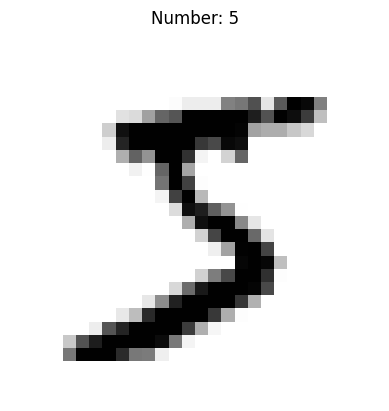

In [ ]:
'''
    Each instance is 28x28 pixels, flattened into a 1D array of 784 features. This can be inferred from the description.
'''
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# # Set DPI globally
# plt.rcParams['figure.dpi'] = 150  # Adjust DPI (e.g., 150 or higher for sharpness)


def plot_digit(X, index, images_per_row=1, y = None, showLabel=True):
    some_instance = X.iloc[index]
    some_image = some_instance.values.reshape(28, 28)

    if showLabel and y is not None:
        plt.title(f"Number: {y[index]}")

    plt.imshow(some_image, cmap=mpl.colormaps['binary'], interpolation='nearest')
    plt.axis('off')
    plt.show()

plot_digit(X,0, y)

In [4]:
'''Checking the type of data in X and y'''
print("Type of X:", X.iloc[0].info)
print("Type of y:", type(y[0]))

Type of X: <bound method Series.info of pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64>
Type of y: <class 'str'>


In [5]:
print(X.iloc[0].value_counts()) # Can be assumed to be pixel values ranging from 0 to 255
print(y.value_counts().sort_values(ascending=False)) # y contains the labels for the digits, which are strings

0
0      618
253     54
18       5
154      3
2        3
      ... 
244      1
133      1
212      1
135      1
132      1
Name: count, Length: 85, dtype: int64
class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64


In [6]:
y = y.astype(np.uint8) # Convert target labels to integers

Splitting the dataset

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Classification Basics - Classifying one class from the rest. Binary Classification

In [8]:
'''
    ---------------------------------------------------------------------------------
    Converting the labels into binary classification labels (true or false).
    --------------------------------------------------------------------------------
    We will try to classify whether the digit is a 5 or not.
    ---------------------------------------------------------------------------------
'''

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Binary Models

1. SGD - Stochastic Gradient Descent

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
print(sgd_clf.predict([X.iloc[0]]))

print("Training accuracy:", sgd_clf.score(X_train, y_train_5))
print("Testing accuracy:", sgd_clf.score(X_test, y_test_5))

c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


[ True]
Training accuracy: 0.9522666666666667
Testing accuracy: 0.9492


In [11]:
'''
    Performing cross-validation to evaluate the model's performance.
'''
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print("Mean Cross-validation scores:", np.mean(sgd_scores))

Mean Cross-validation scores: 0.9570333333333334


In [12]:
'''
    Making a dumb classifier that always predicts the most frequent class.
    -------------------------------------------------------------------------
    This is useful for comparison to see how well our model performs against a naive baseline.    
'''
from sklearn.base import BaseEstimator

class MostFrequentClassifier(BaseEstimator):
    def fit(self, X, y):
        self.most_frequent_class = y.value_counts().idxmax()
        self.data_type = y.dtype
        return self
    
    def predict(self, X):
        return np.full((X.shape[0],), self.most_frequent_class, dtype=self.data_type)

never_5_clf = MostFrequentClassifier()
never_5_clf.fit(X_train, y_train_5)
never_5_scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')
print("Mean Cross-validation scores for Most Frequent Classifier:", np.mean(never_5_scores))

Mean Cross-validation scores for Most Frequent Classifier: 0.90965


Understanding the confusion matrix

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

sgd_conf_mx  = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:\n", sgd_conf_mx)

sgd_precision = precision_score(y_train_5, y_train_pred)
sgd_recall = recall_score(y_train_5, y_train_pred)
print("Precision:", sgd_precision)
print("Recall:", sgd_recall)

sgd_f1 = f1_score(y_train_5, y_train_pred)
print("F1 Score:", sgd_f1)

Confusion Matrix:
 [[53892   687]
 [ 1891  3530]]
Precision: 0.8370879772350012
Recall: 0.6511713705958311
F1 Score: 0.7325171197343847


In [15]:
'''
    Getting the score instead of the classification using the decision function.
'''
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

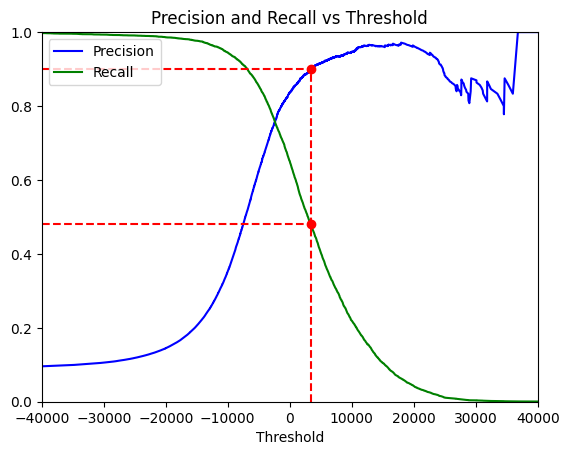

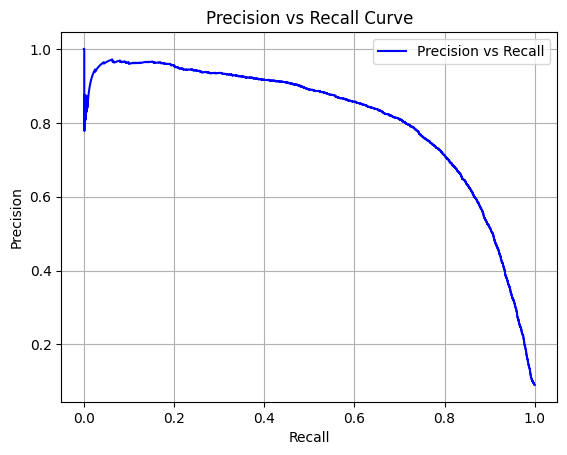

In [16]:
'''
    Plotting the precision-recall curve.
'''
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precision, recall, thresholds, plotThresholds=False, targetPrecision=None):
    if (plotThresholds):
        assert targetPrecision is not None, "targetPrecision must be provided if plotThresholds is True"

    plt.ylim([0, 1])
    plt.xlim([-40000, 40000])
    plt.plot(thresholds, precision[:-1], "b-", label="Precision")
    plt.plot(thresholds, recall[:-1], "g-", label="Recall")
    l, r = plt.xlim()
    x_range = r - l

    if (plotThresholds):
        index_90_precision = np.argmax(precision >= targetPrecision)
        threshold_90_precision = thresholds[index_90_precision]
        recall_90_precision = recall[index_90_precision]
        plt.plot(thresholds[index_90_precision], precision[index_90_precision], "ro")
        plt.plot(thresholds[index_90_precision], recall[index_90_precision], "ro")
        plt.axvline(x=threshold_90_precision, ymax=precision[index_90_precision], color='r', linestyle='--')
        plt.axhline(y=recall_90_precision, xmax=(threshold_90_precision - l) / x_range, color='r', linestyle='--')
        plt.axhline(y=precision[index_90_precision], xmax=(threshold_90_precision - l) / x_range, color='r', linestyle='--')


    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision and Recall vs Threshold")
    plt.show()

def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "b-", label="Precision vs Recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_precision_recall_vs_threshold(precision, recall, thresholds, True, 0.90)
plot_precision_vs_recall(precision, recall)

In [17]:
index_90_precision = np.argmax(precision >= 0.9)
threshold_90_precision = thresholds[index_90_precision]
recall_90_precision = recall[index_90_precision]
print("Threshold for 90% precision:", threshold_90_precision)
print("Recall at 90% precision:", recall_90_precision)

Threshold for 90% precision: 3370.0194991439557
Recall at 90% precision: 0.4799852425751706


In [18]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

precision_90 = precision_score(y_train_5, y_train_pred_90)
recall_90 = recall_score(y_train_5, y_train_pred_90)
print("Precision at 90%:", precision_90)
print("Recall at 90%:", recall_90)

Precision at 90%: 0.9000345901072293
Recall at 90%: 0.4799852425751706


Plotting the ROC Curve

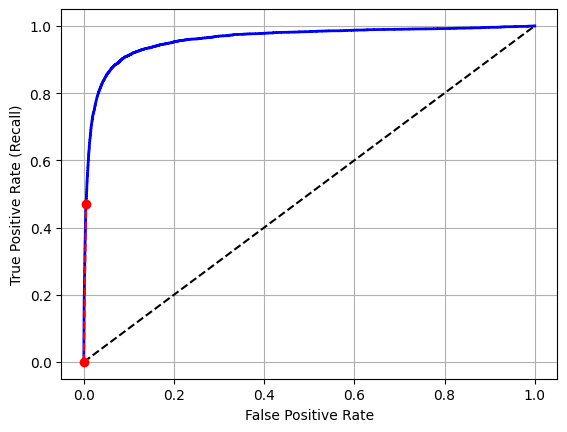

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, target=None, label=None):
    plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
    plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
    if target is not None:
        target_index = np.argmin(fpr <= target)
        tpr_recall = tpr[target_index]
        fpr_recall = fpr[target_index]
        plt.plot([0,fpr_recall], [0,tpr_recall], "ro--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title(label)
    plt.grid()

plot_roc_curve(fpr, tpr, target=0.005)
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_train_5, y_scores)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9604938554008616


WHEN TO USE WHAT?! Use Precision-Recall Curve when there are less positive samples and you care about false positive more than false negatives.

2. Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

rf_proba_scores = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method="predict_proba")
rf_y_scores = rf_proba_scores[:, 1]


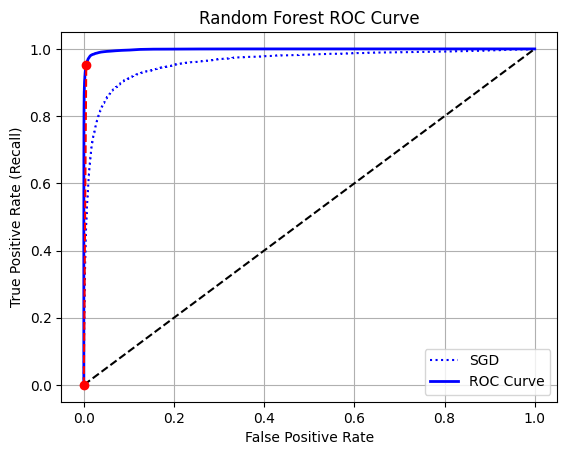

In [61]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5, rf_y_scores)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_rf, tpr_rf, target=0.005, label="Random Forest ROC Curve")
plt.legend()
plt.show()

In [ ]:
rf_roc_auc = roc_auc_score(y_train_5, rf_y_scores)
print("Random Forest ROC AUC Score:", rf_roc_auc)

rf_precision = precision_score(y_train_5, rf_y_scores >= 0.5)
rf_recall = recall_score(y_train_5, rf_y_scores >= 0.5)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)

Random Forest ROC AUC Score: 0.9983436731328145
Random Forest Precision: 0.9897468089558485
Random Forest Recall: 0.8725327430363402


# Multiclass Classifiers

In [66]:
'''
    ---------------------------------------------------------------------------
    Some classifiers are inherently multi-class classifiers, such as RandomForestClassifier.
    ---------------------------------------------------------------------------
    But, Binary classifiers can be used for multi-class classification by using the One-vs-Rest/All (OvR/OvA) strategy or One-vs-One (OvO) stratergy.
    ---------------------------------------------------------------------------
    Sklearn does this automatically for most classifiers.
    ---------------------------------------------------------------------------
    It uses the One-vs-Rest strategy by default, but you can specify the strategy using the 'multi_class' parameter. Except for some classifiers like SVM, which use One-vs-One by default.
    ---------------------------------------------------------------------------
    Thus, we can directly use the SGDClassifier for multi-class classification without any changes.
    ---------------------------------------------------------------------------
    Under the hood, sklearn will create multiple binary classifiers, one for each class, and combine their predictions.
    ---------------------------------------------------------------------------
    This is known as One-vs-Rest strategy.
    ----------------------------------------------------------------------------
'''

sgd_clf_multi = SGDClassifier(random_state=42)
sgd_clf_multi.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [67]:
some_prediction = sgd_clf_multi.predict([X.iloc[0]])
print("Prediction for the first instance in multi-class classification:", some_prediction)

some_prediction_scores = sgd_clf_multi.decision_function([X.iloc[0]])
print("Decision function scores for the first instance in multi-class classification:", some_prediction_scores)

Prediction for the first instance in multi-class classification: [3]
Decision function scores for the first instance in multi-class classification: [[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]


c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [78]:
print(some_prediction_scores)
print()
print("Class labels:", sgd_clf_multi.classes_)
print()
print(sgd_clf_multi.classes_[np.argmax(some_prediction_scores)])


[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]

Class labels: [0 1 2 3 4 5 6 7 8 9]

3


In [79]:
# Using one-vs-one strategy
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)


OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [81]:
ovo_prediction = ovo_clf.predict([X.iloc[0]])
print("Prediction for the first instance using One-vs-One strategy:", ovo_prediction)

ovo_prediction_scores = ovo_clf.decision_function([X.iloc[0]])
print("Decision function scores for the first instance using One-vs-One strategy:", len(ovo_clf.estimators_))

Prediction for the first instance using One-vs-One strategy: [5]
Decision function scores for the first instance using One-vs-One strategy: 45


c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(
c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


In [82]:
# Using RandomForestClassifier for multi-class classification
rf_clf_multi = RandomForestClassifier(random_state=42)
rf_clf_multi.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
some_rf_prediction = rf_clf_multi.predict([X.iloc[0]])
print("Prediction for the first instance using Random Forest multi-class classifier:", some_rf_prediction)

rf_prediction_scores = rf_clf_multi.predict_proba([X.iloc[0]])
print("Prediction probabilities for the first instance using Random Forest multi-class classifier:", rf_prediction_scores)

Prediction for the first instance using Random Forest multi-class classifier: [5]
Prediction probabilities for the first instance using Random Forest multi-class classifier: [[0.   0.   0.01 0.08 0.   0.9  0.   0.   0.   0.01]]


c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [84]:
multi_class_cvs = cross_val_score(sgd_clf_multi, X_train, y_train, cv=3, scoring='accuracy')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

multi_class_cvs_scaled = cross_val_score(sgd_clf_multi, X_train_scaled, y_train, cv=3, scoring='accuracy')

Cross-validation scores for multi-class classification without scaling: 0.8669666666666668
Cross-validation scores for multi-class classification with scaling: 0.8970333333333333


In [86]:
print("Cross-validation scores for multi-class classification without scaling:", np.mean(multi_class_cvs))
print("Cross-validation scores for multi-class classification with scaling:", np.mean(multi_class_cvs_scaled))  

Cross-validation scores for multi-class classification without scaling: 0.8669666666666668
Cross-validation scores for multi-class classification with scaling: 0.8970333333333333


In [87]:
y_train_pred_multi = cross_val_predict(sgd_clf_multi, X_train_scaled, y_train, cv=3)  

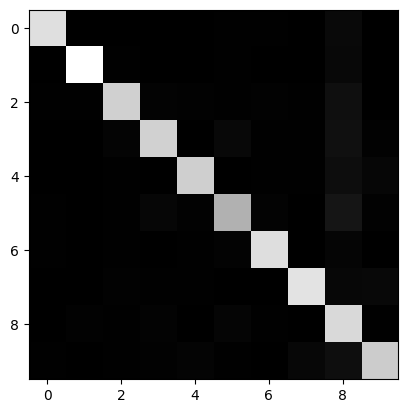

In [89]:
sgd_multi_conf_mx = confusion_matrix(y_train, y_train_pred_multi)
# print("Confusion Matrix for multi-class classification:\n", sgd_multi_conf_mx)

plt.imshow(sgd_multi_conf_mx, cmap=plt.cm.gray, interpolation='nearest')


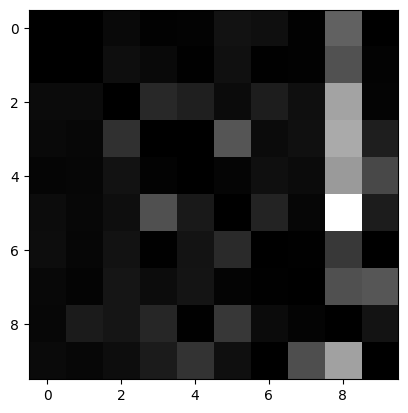

In [92]:
# Normalizing the confusion matrix for better visualization
row_sums = sgd_multi_conf_mx.sum(axis=1, keepdims=True)
normalized_conf_mx = sgd_multi_conf_mx / row_sums
np.fill_diagonal(normalized_conf_mx, 0)  # Set the diagonal to 0 for better visualization
plt.imshow(normalized_conf_mx, cmap=plt.cm.gray, interpolation='nearest')

TypeError: plot_digit() got an unexpected keyword argument 'images_per_row'

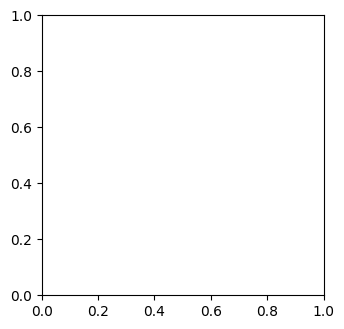

In [93]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digit(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digit(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digit(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digit(X_bb[:25], images_per_row=5)
plt.show()